<a href="https://colab.research.google.com/github/alanperez/HLT-Portfolio/blob/main/text-classification/CS4395_001_TEXT_CLASSIFICATION_AXP200075.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alan Perez** |
**AXP200075** |
**CS 4395.001** |
**Assignment: Text Classification**

### **Text Classification**

1.   Gain experience with Naïve Bayes, Logistic Regression, Neural Networks with sklearn using text data
2.   Gain experience with text classification



Dataset: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:

#load data

# target column 2 which is sentiment and 3 which is tweet content
data = pd.read_csv('twitter.csv',usecols=[2,3], names=['sentiment', 'tweet_content'],encoding='latin-1')

# check for NaN values
print(data.isna().sum())
# check if there  are unexpected types

print(data.applymap(type))
# replace NaN with empty str
data.fillna('', inplace=True)

# convert columns to string type
data['sentiment'] = data['sentiment'].astype(str)
data['tweet_content'] = data['tweet_content'].astype(str)
data = data.astype(str)
display(data)

# check the data types of each column
print('data dtypes: ', data.dtypes)

print('shape rows column: ', data.shape)
print('head : ', data.head)
print('tail: ', data.tail)

# check for NaN values
print(data.isna().sum())
print(data.columns)

sentiment          0
tweet_content    686
dtype: int64
           sentiment  tweet_content
0      <class 'str'>  <class 'str'>
1      <class 'str'>  <class 'str'>
2      <class 'str'>  <class 'str'>
3      <class 'str'>  <class 'str'>
4      <class 'str'>  <class 'str'>
...              ...            ...
74677  <class 'str'>  <class 'str'>
74678  <class 'str'>  <class 'str'>
74679  <class 'str'>  <class 'str'>
74680  <class 'str'>  <class 'str'>
74681  <class 'str'>  <class 'str'>

[74682 rows x 2 columns]


,sentiment,tweet_content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


data dtypes:  sentiment        object
tweet_content    object
dtype: object
sentiment        0
tweet_content    0
dtype: int64
Index(['sentiment', 'tweet_content'], dtype='object')


# Visualization of the graph

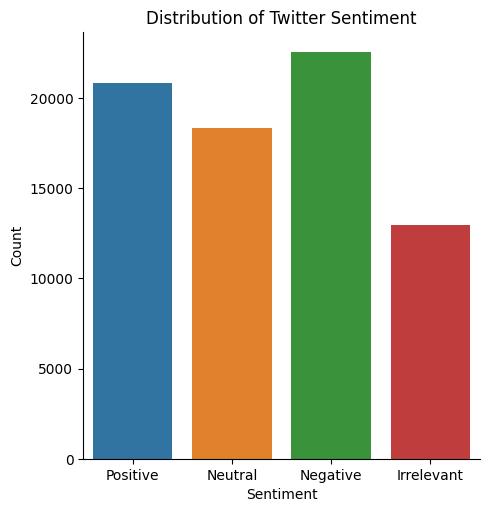

In [122]:
sb.catplot(x="sentiment", kind="count", data=data)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Twitter Sentiment')
plt.show()

# Train and Test Sets

In [123]:
# Divide into train and test sets
# set up X and Y
X = data["tweet_content"]
y = data["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8, random_state=1234)

# take a peek at the data
# this is a very sparse matrix because most of the 8613 words don't occur in each sms message

print('train size:', X_train.shape)
print(X_train)

print('\ntest size:', X_test.shape)
print(X_test[:5])

train size: (59745,)
22900    CS : FC GO Wingman Romania - Tech Sunt 2012 no...
49433                                    A ZAYN IN MY DAY.
12669    RhandlerR another one with my guy! RhandlerR R...
4633                                   Are you kidding me?
820      I went to bed at 4am. 5 hours before that at 9...
                               ...                        
55985    Fuck YouTube that twitch me donât wanna use ...
32399                                                   to
60620                      Check out my Facebook to see my
34086    @FortniteGame this new update makes everyone l...
58067    @Rainbow6Game is there great way to stop the p...
Name: tweet_content, Length: 59745, dtype: object

test size: (14937,)
36232    Microsoft onedrive : 7 A hate thread. 1 / ME 3462
55480    A Tried cod warzone with controller today, how...
27065    not am really looking forward to that. I loved...
30344    I have no idea what this is but is positive an...
34082    my twin tasks 

# Text-Preprocessing

In [124]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk

# Set stopwords as a list
stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))

# Ensure input data is in the correct format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

# Apply the TfidfVectorizer
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# peek at data
print('train size:', X_train.shape)
print(X_train.toarray()[:5])

print('\ntest size:', X_test.shape)
print(X_test.toarray()[:5])

train size: (59745, 30687)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test size: (14937, 30687)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Naive Bayes

In [125]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

BernoulliNB()

NB Model

The Bernouli NB model has a 73.8% accuracy compared to the other model along with higher precision. 

In [126]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import math
prior_p = sum(y_train == 1)/len(y_train)
print('prior sentiment:', prior_p, 'log of prior:', math.log(prior_p + 1e-6 ))

# the model prior matches the prior calculated above
naive_bayes.class_log_prior_[1]


# make predictions on the test data
pred = naive_bayes.predict(X_test)

# confusion matrix
print('confusion matrix: ', confusion_matrix(y_test, pred))


# accuracy score

print('\naccuracy score: ', accuracy_score(y_test, pred))

# precision
print('\nprecision score : ', precision_score(y_test, pred, average='macro'))
# recall
print('\nrecall score: ', recall_score(y_test, pred, average='macro'))
      
print('\nf1 score: ', f1_score(y_test, pred, average='macro'))

# precision 
print('\nprecision score: ', precision_score(y_test, pred, average=None))
# recall
print('\nrecall score: ', recall_score(y_test, pred,average=None))
      
print('\nf1 score: ', f1_score(y_test, pred, average=None))

prior sentiment: 0.0 log of prior: -13.815510557964274
confusion matrix:  [[1489  385   49  722]
 [  46 3659  106  707]
 [ 117  497 2208  875]
 [  38  301  101 3637]]

accuracy score:  0.7359576889602999

precision score :  0.7862587391858183

recall score:  0.7155347747769816

f1 score:  0.7279159873371306

precision score:  [0.88106509 0.75567947 0.8961039  0.6121865 ]

recall score:  [0.56294896 0.80987162 0.59724101 0.89207751]

f1 score:  [0.68696655 0.78183761 0.71676676 0.72609303]


I'll be using the Multinomial Bayes classifier and evaluating the model for the second attempt. Will have the average set to none for the first one then setting the other portion to micro


'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

In [127]:
from sklearn.naive_bayes import MultinomialNB

nb_v2 = MultinomialNB()
nb_v2.fit(X_train, y_train)


MultinomialNB()

In [128]:
# make predictions on the test data
predv2 = nb_v2.predict(X_test)


# confusion matrix
print('confusion matrix: ', confusion_matrix(y_test, predv2))

#[positive, neutral, negative, irrelevant] 
# accuracy score

print('\naccuracy score: ', accuracy_score(y_test, predv2))

# precision
print('\nprecision score : ', precision_score(y_test, predv2, average=None))
# recall
print('\nrecall score: ', recall_score(y_test, predv2,average=None))
      
print('\nf1 score: ', f1_score(y_test, predv2, average=None))

# weighted
print('\nprecision score micro: ', precision_score(y_test, predv2, average="micro"))
# recall
print('\nrecall score micro: ', recall_score(y_test, predv2,average="micro"))
      
print('\nf1 score micro: ', f1_score(y_test, predv2, average="micro"))

confusion matrix:  [[1197  736  148  564]
 [  11 4067  130  310]
 [  20  762 2402  513]
 [  17  609  124 3327]]

accuracy score:  0.7359576889602999

precision score :  [0.96144578 0.65873016 0.85663338 0.70577005]

recall score:  [0.45255198 0.90017707 0.64971599 0.81604121]

f1 score:  [0.61542416 0.76075571 0.73896324 0.75691048]

precision score micro:  0.7359576889602999

recall score micro:  0.7359576889602999

f1 score micro:  0.7359576889602999


# Logistic Regression

I'll be using LR with and without pipelines in two attempts



In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

#train
classifier = LogisticRegression(solver='lbfgs', class_weight='balanced',max_iter=1000)
classifier.fit(X_train, y_train)

# evaluate
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, average=None))
print('recall score: ', recall_score(y_test, pred, average=None))
print('f1 score: ', f1_score(y_test, pred, average=None))
probs = classifier.predict_proba(X_test)
print('log loss: ', log_loss(y_test, probs))



print('accuracy score micro: ', accuracy_score(y_test, pred))
print('precision score micro: ', precision_score(y_test, pred, average='micro'))
print('recall score micro: ', recall_score(y_test, pred,average='micro'))
print('f1 score micro: ', f1_score(y_test, pred,average='micro'))
probs = classifier.predict_proba(X_test)
print('log loss micro: ', log_loss(y_test, probs))

accuracy score:  0.7903193412331794
precision score:  [0.67575015 0.84694594 0.81042927 0.80621339]
recall score:  [0.83440454 0.80101815 0.76088721 0.77655139]
f1 score:  [0.74674336 0.82334205 0.78487723 0.79110445]
log loss:  0.6726464750888004
accuracy score micro:  0.7903193412331794
precision score micro:  0.7903193412331794
recall score micro:  0.7903193412331794
f1 score micro:  0.7903193412331795
log loss micro:  0.6726464750888004


This attempt will use pipeline

In [133]:
from sklearn.pipeline import Pipeline


# read in data, split raw data into train and test, then use pipeline to transform
pipe1 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=list(stopwords), binary=True)),
    ('logreg', LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000)),
])

# Use the raw text data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

pipe1.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(binary=True,
                                 stop_words=['am', 'which', 'been', 'here',
                                             'herself', 'you', 'mightn', 'be',
                                             'into', "hadn't", 'yourself',
                                             'for', 'her', 'were', 'being',
                                             'of', 'between', 'above', 've',
                                             'hadn', 'm', 'an', 'does', 'was',
                                             'weren', 'before', 'so', "it's",
                                             'isn', 'further', ...])),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [137]:
pred = pipe1.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, average=None))
print('recall score: ', recall_score(y_test, pred,average=None))
print('f1 score: ', f1_score(y_test, pred,average=None))
probs = pipe1.predict_proba(X_test)
print('log loss: ', log_loss(y_test, probs))


print('accuracy score micro: ', accuracy_score(y_test, pred))
print('precision score micro: ', precision_score(y_test, pred, average='micro'))
print('recall score micro: ', recall_score(y_test, pred,average='micro'))
print('f1 score micro: ', f1_score(y_test, pred,average='micro'))
probs = pipe1.predict_proba(X_test)
print('log loss micro: ', log_loss(y_test, probs))


accuracy score:  0.7977505523197429
precision score:  [0.77024616 0.85114862 0.74924166 0.80828221]
recall score:  [0.81625709 0.80367419 0.80173113 0.77557027]
f1 score:  [0.79258443 0.82673042 0.7745982  0.79158843]
log loss:  0.6686961671968155
accuracy score micro:  0.7977505523197429
precision score micro:  0.7977505523197429
recall score micro:  0.7977505523197429
f1 score micro:  0.7977505523197429
log loss micro:  0.6686961671968155


Based on the results Logistic Regression gives better results than Naive Bayes.

The Logistic Regression model performs better with an accuracy of 0.7978, while the Naive Bayes model has an accuracy of 0.7360. This means that the LR model classifies a higher percentage of instances correctly.

Regarding the other scores the LR performs better across all classes. While the Naive bayes has a very high precision score for the first class, its recall score is much lower. This means that the NB model is overly conservative in predicting the first class which has a negative effect on the performance.


# Neural Network

In [146]:


# text preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stopwords_list = stopwords.words('english')

# Create the TfidfVectorizer with the list of stopwords
vectorizer = TfidfVectorizer(stop_words=stopwords_list, binary=True)

# target column 2 which is sentiment and 3 which is tweet content
data = pd.read_csv('twitter.csv',usecols=[2,3], names=['sentiment', 'tweet_content'],encoding='latin-1')

# Replace NaN with empty str
data.fillna('', inplace=True)

# Set up X and y
X = vectorizer.fit_transform(data.tweet_content)
y = data.sentiment

# convert columns to string type
data['sentiment'] = data['sentiment'].astype(str)
data['tweet_content'] = data['tweet_content'].astype(str)


# Set up X and y
X = vectorizer.fit_transform(data.tweet_content)
y = data.sentiment


# Ensure input data is in the correct format
# Apply the TfidfVectorizer

# divide into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)



from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=2000,
                   hidden_layer_sizes=(15, 2), random_state=1)
classifier.fit(X_train, y_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), max_iter=2000,
              random_state=1, solver='lbfgs')

In [151]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
pred = classifier.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, average=None))
print('recall score: ', recall_score(y_test, pred, average=None))
print('f1 score: ', f1_score(y_test, pred, average=None))


print('accuracy score ', accuracy_score(y_test, pred))
print('precision score micro: ', precision_score(y_test, pred, average='micro'))
print('recall score micro: ', recall_score(y_test, pred, average='micro'))
print('f1 score micro: ', f1_score(y_test, pred, average='micro'))

accuracy score:  0.6910356832027851
precision score:  [0.77754504 0.78903346 0.64365833 0.59383519]
recall score:  [0.70170132 0.75166003 0.60535569 0.6946284 ]
f1 score:  [0.73767886 0.76989345 0.62391971 0.6402894 ]
accuracy score  0.6910356832027851
precision score micro:  0.6910356832027851
recall score micro:  0.6910356832027851
f1 score micro:  0.6910356832027851


The Neural Network returns a moderate performance which an accuracy score of 69.1%. I've displayed the other scores of each class seperately and the micro averaged scores 'positive', 'neutral', 'negative' and 'irrelevant'

The performance of the classifier could have been further improved by exploring alternative methods.

# Analysis - Conlusion


    Logistic Regression:
        Accuracy: 79.78%
        Precision: [0.770, 0.851, 0.749, 0.808]
        Recall: [0.816, 0.804, 0.802, 0.776]
        F1 Score: [0.793, 0.827, 0.775, 0.792]
        Log loss: 0.6687
        Micro-averaged Precision, Recall, and F1 score are all equal to 79.78%.

    Naive Bayes:
        Accuracy: 73.60%
        Precision: [0.961, 0.659, 0.857, 0.706]
        Recall: [0.453, 0.900, 0.650, 0.816]
        F1 Score: [0.615, 0.761, 0.739, 0.757]
        Micro-averaged Precision, Recall, and F1 score are all equal to 73.60%.

    Neural Network (MLPClassifier):
        Accuracy: 69.10%
        Precision: [0.778, 0.789, 0.644, 0.594]
        Recall: [0.702, 0.752, 0.605, 0.695]
        F1 Score: [0.738, 0.770, 0.624, 0.640]
        Micro-averaged Precision, Recall, and F1 score are all equal to 69.10%.

Out of the three methods, the Logistic Regression performs the best in terms of accuracy, precision, recall, and F1 score. The second best performing would be Naive Bayes, and lastly the lowest performing is Neural Network

The dataset that I chose was a twitter analysis sentiment and it seems that it worked well with this data set since LR assumes a linear releationship. Generally, Logistic Regression is faster to train, interpret, and less prone to overfitting compared to Neural Networks. Each model highly depends on the specific problem and dataset so that's the reason why the results are how they are.

The Neural network captures more complex patterns and it might have had a different outcome if a more complex dataset was used. Using NN requires more data and computational resources to train, but its also prone to overfitting. 



